In [ ]:
!pip install matplotlib

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
import pickle
import matplotlib.pyplot as plt

In [4]:
pd.read_csv('50_Startups.csv')
df = pd.read_csv('50_Startups.csv')
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [5]:
df = pd.get_dummies(df, drop_first=True, dtype=int)
df.head()

,R&D Spend,Administration,Marketing Spend,Profit,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,0,1
1,162597.70,151377.59,443898.53,191792.06,0,0
2,153441.51,101145.55,407934.54,191050.39,1,0
3,144372.41,118671.85,383199.62,182901.99,0,1
4,142107.34,91391.77,366168.42,166187.94,1,0


In [6]:
df.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'Profit',
       'State_Florida', 'State_New York'],
      dtype='object')

In [7]:
independent = df[['R&D Spend', 'Administration', 'Marketing Spend',
       'State_Florida', 'State_New York']]
dependent = df['Profit']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(independent, dependent, test_size=0.3, random_state=0)

In [10]:
y_train

7     155752.60
14    132602.65
45     64926.08
48     35673.41
29    101004.64
15    129917.04
30     99937.59
32     97427.84
16    126992.93
42     71498.49
20    118474.03
43     69758.98
8     152211.77
13    134307.35
25    107404.34
5     156991.12
17    125370.37
40     78239.91
49     14681.40
1     191792.06
12    141585.52
37     89949.14
24    108552.04
6     156122.51
23    108733.99
36     90708.19
21    111313.02
19    122776.86
9     149759.96
39     81005.76
46     49490.75
3     182901.99
0     192261.83
47     42559.73
44     65200.33
Name: Profit, dtype: float64

In [11]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [16]:
regressor = SVR(kernel='sigmoid', C=13000, gamma=0.1)
regressor.fit(X_train, y_train)
 

,kernel,'sigmoid'
,degree,3
,gamma,0.1
,coef0,0.0
,tol,0.001
,C,13000
,epsilon,0.1
,shrinking,True
,cache_size,200
,verbose,False
,max_iter,-1


In [17]:
y_pred = regressor.predict(X_test)

In [18]:
r2_score(y_test, y_pred)

0.8247372195065548

In [69]:
regressor.intercept_

array([112668.15951088])

In [70]:
regressor.support_

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34], dtype=int32)

In [71]:
regressor.n_support_

array([35], dtype=int32)

In [114]:
r2_score(y_test, y_pred)

0.5928977271145746

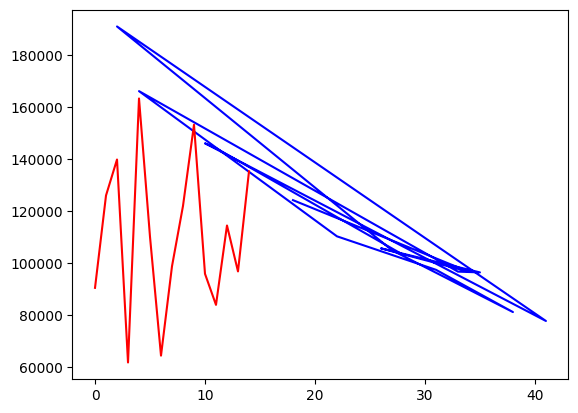

In [101]:

plt.plot(y_test, color='blue', label='test')
plt.plot(y_pred, color='red', label='Predict')
# plt.scatter(y_test, regressor.predict(X_test))
# plt.xlabel('Actual Profit')
# plt.ylabel('Predicted Profit')
# plt.title('Actual vs Predicted Profit')
plt.show()